In [ ]:
!nvidia-smi

Fri Sep  6 05:40:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:


!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.3/112.6 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="b33XFWLcuAi4lMDTF5HC")
project = rf.workspace("project-ynaln").project("trackaid")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TrackAid-2 in yolov8:: 100%|██████████| 2816/2816 [00:00<00:00, 4873.90it/s]


In [ ]:
from ultralytics import YOLO

# Load the pre-trained model
model = YOLO('yolov8n.pt')

# Train the model
model.train(data='/content/TrackAid-2/data.yaml',
            epochs=50,
            imgsz=800,
            batch=16,
            workers=4,
            device=0,
            lr0=1e-4,
            lrf=0.01,
            save_period=10,
            name='yolov8_augmented')


100%|██████████| 6.23M/6.23M [00:00<00:00, 108MB/s]
You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
New https://pypi.org/project/ultralytics/8.2.87 available 😃 Update with 'pip install -U ultr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7978b42d3a60>
fitness: 0.7527607657155403
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.63981,     0.83236])
names: {0: 'child', 1: 'therapist'}
plot: True
results_dict: {'metrics/precision(B)': 0.8324741435103686, 'metrics/recall(B)': 0.9045632087148333, 'metrics/mAP50(B)': 0.9028284658749577, 'metrics/mAP50-95(B)': 0.7360865768089384, 'fitness': 0.7527607657155403}
save_dir: PosixPath('runs/detect/yolov8_augmented')
speed: {'preprocess': 0.4016813049968492, 'inference': 3.4070208541348452, 'loss': 0.0011717152391743457, 'postprocess': 4.661439830421383}

/content


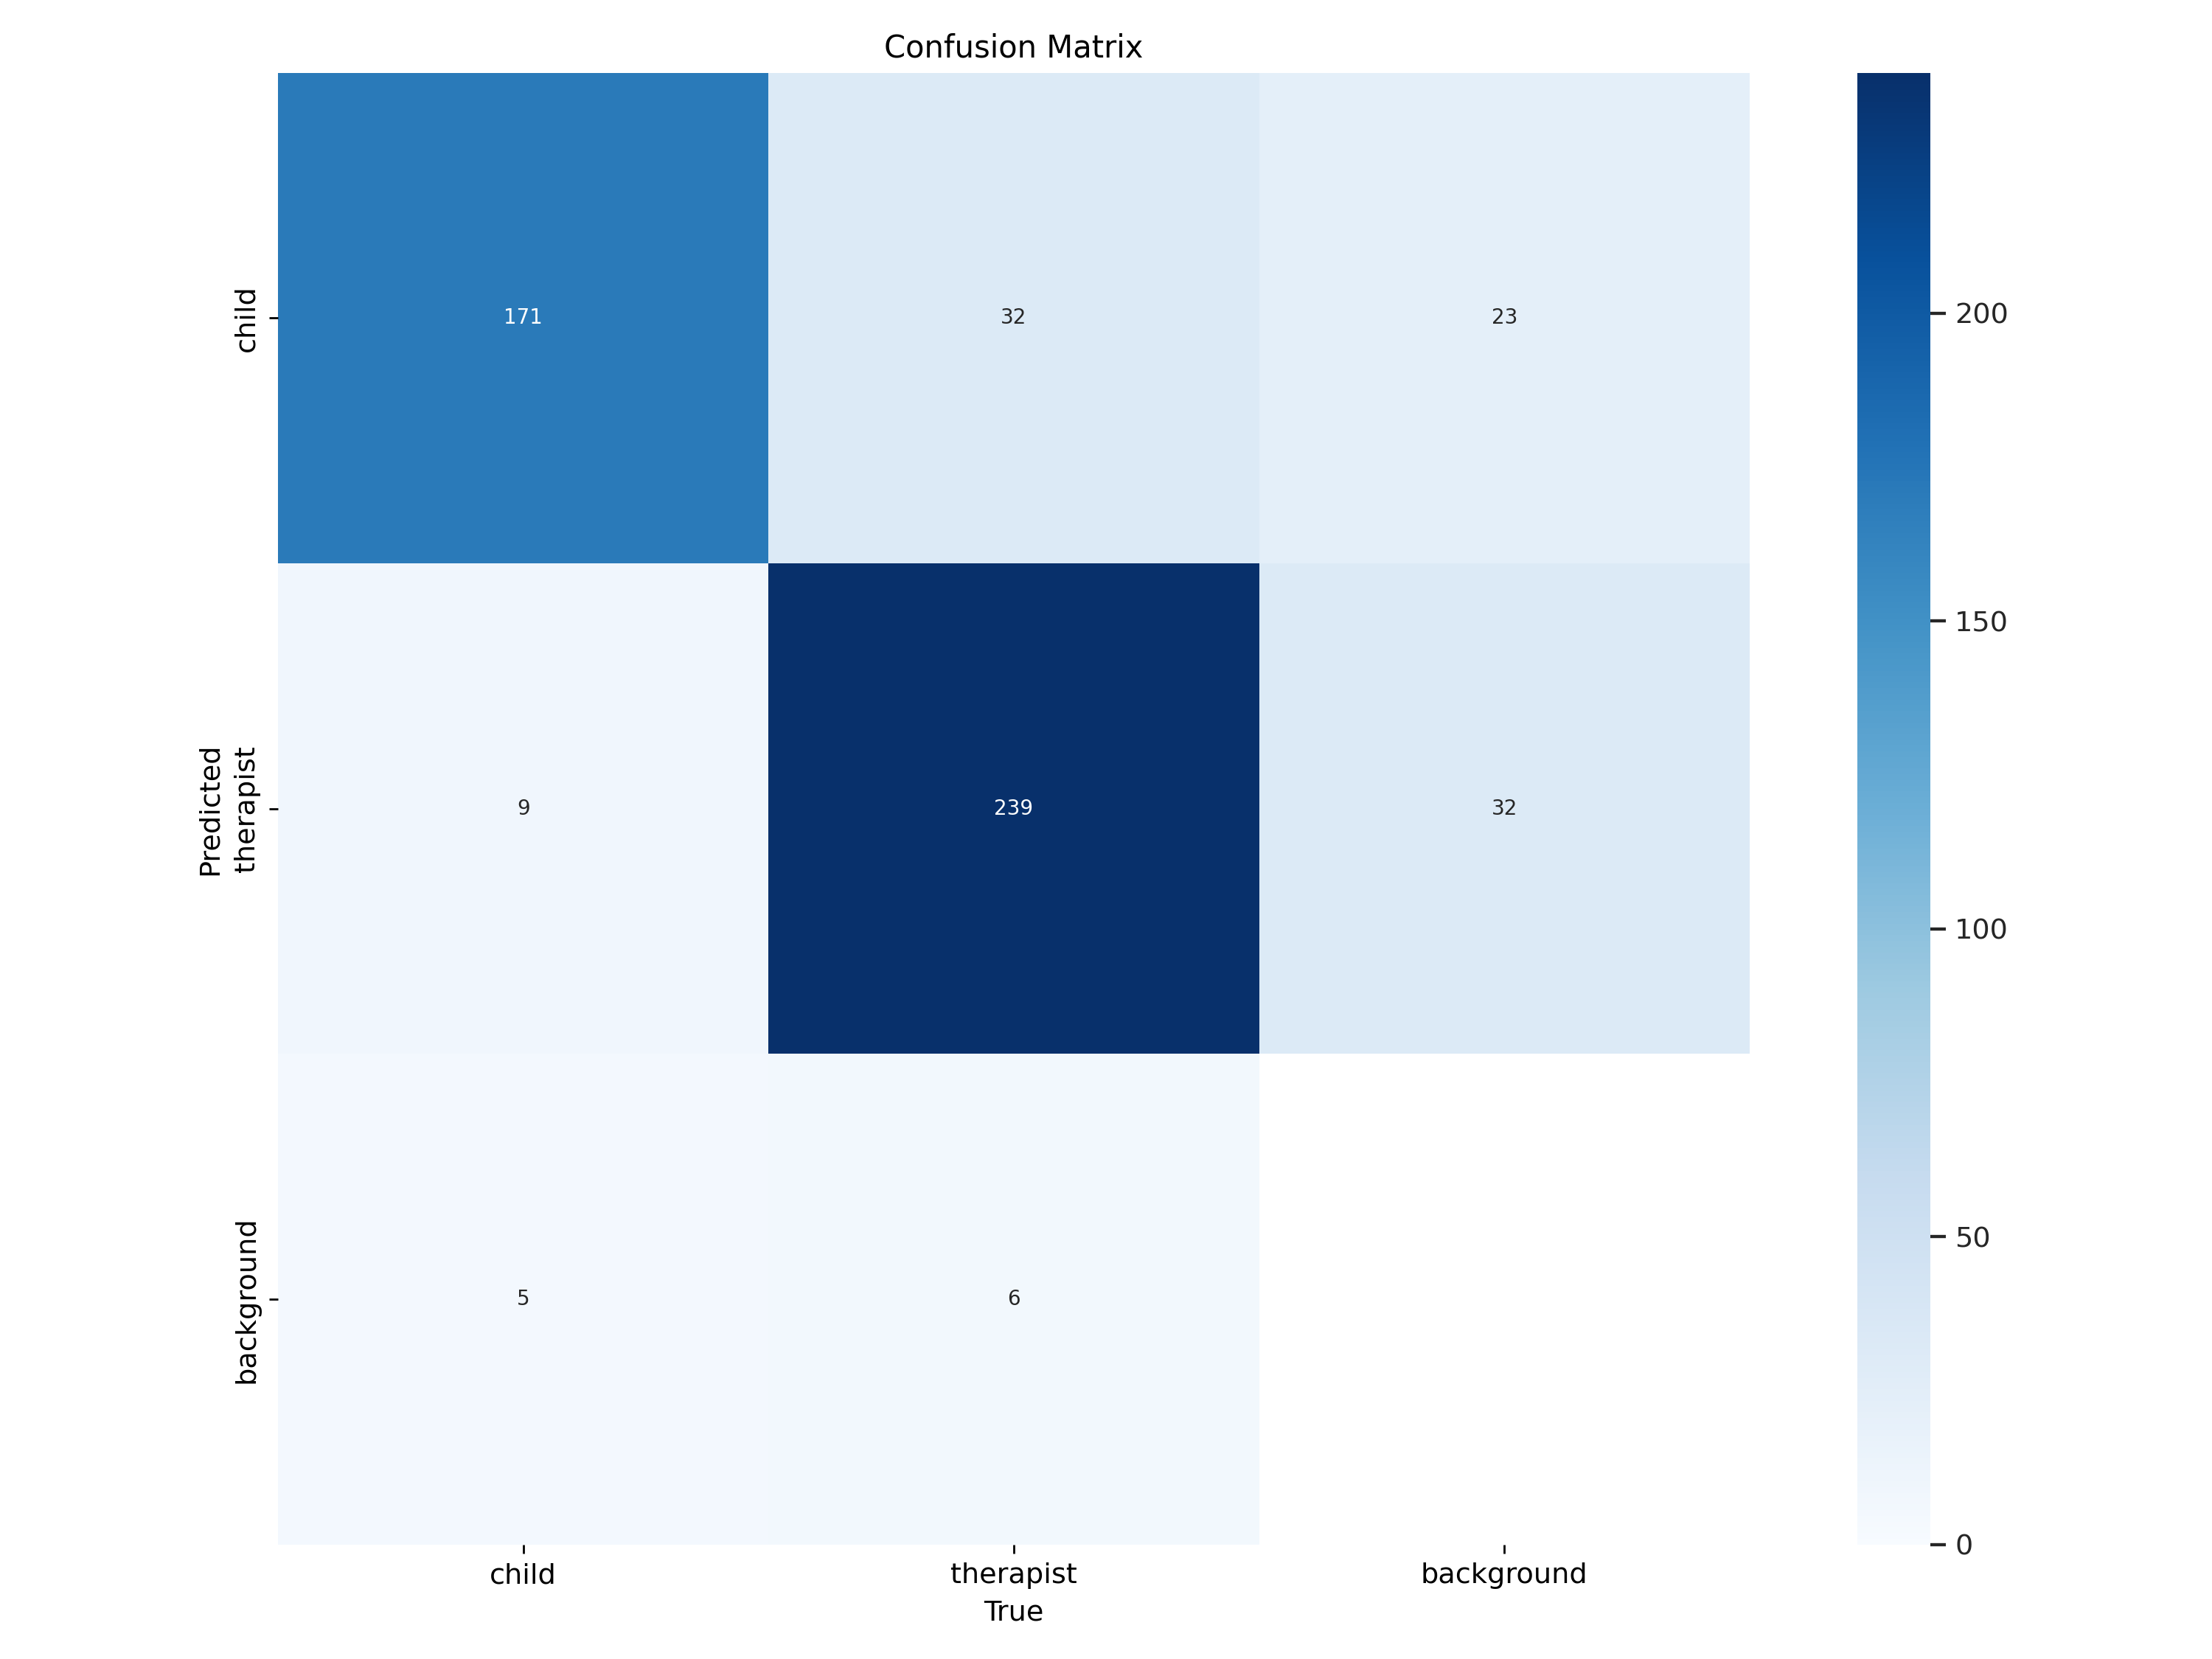

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/yolov8_augmented/confusion_matrix.png', width=600)

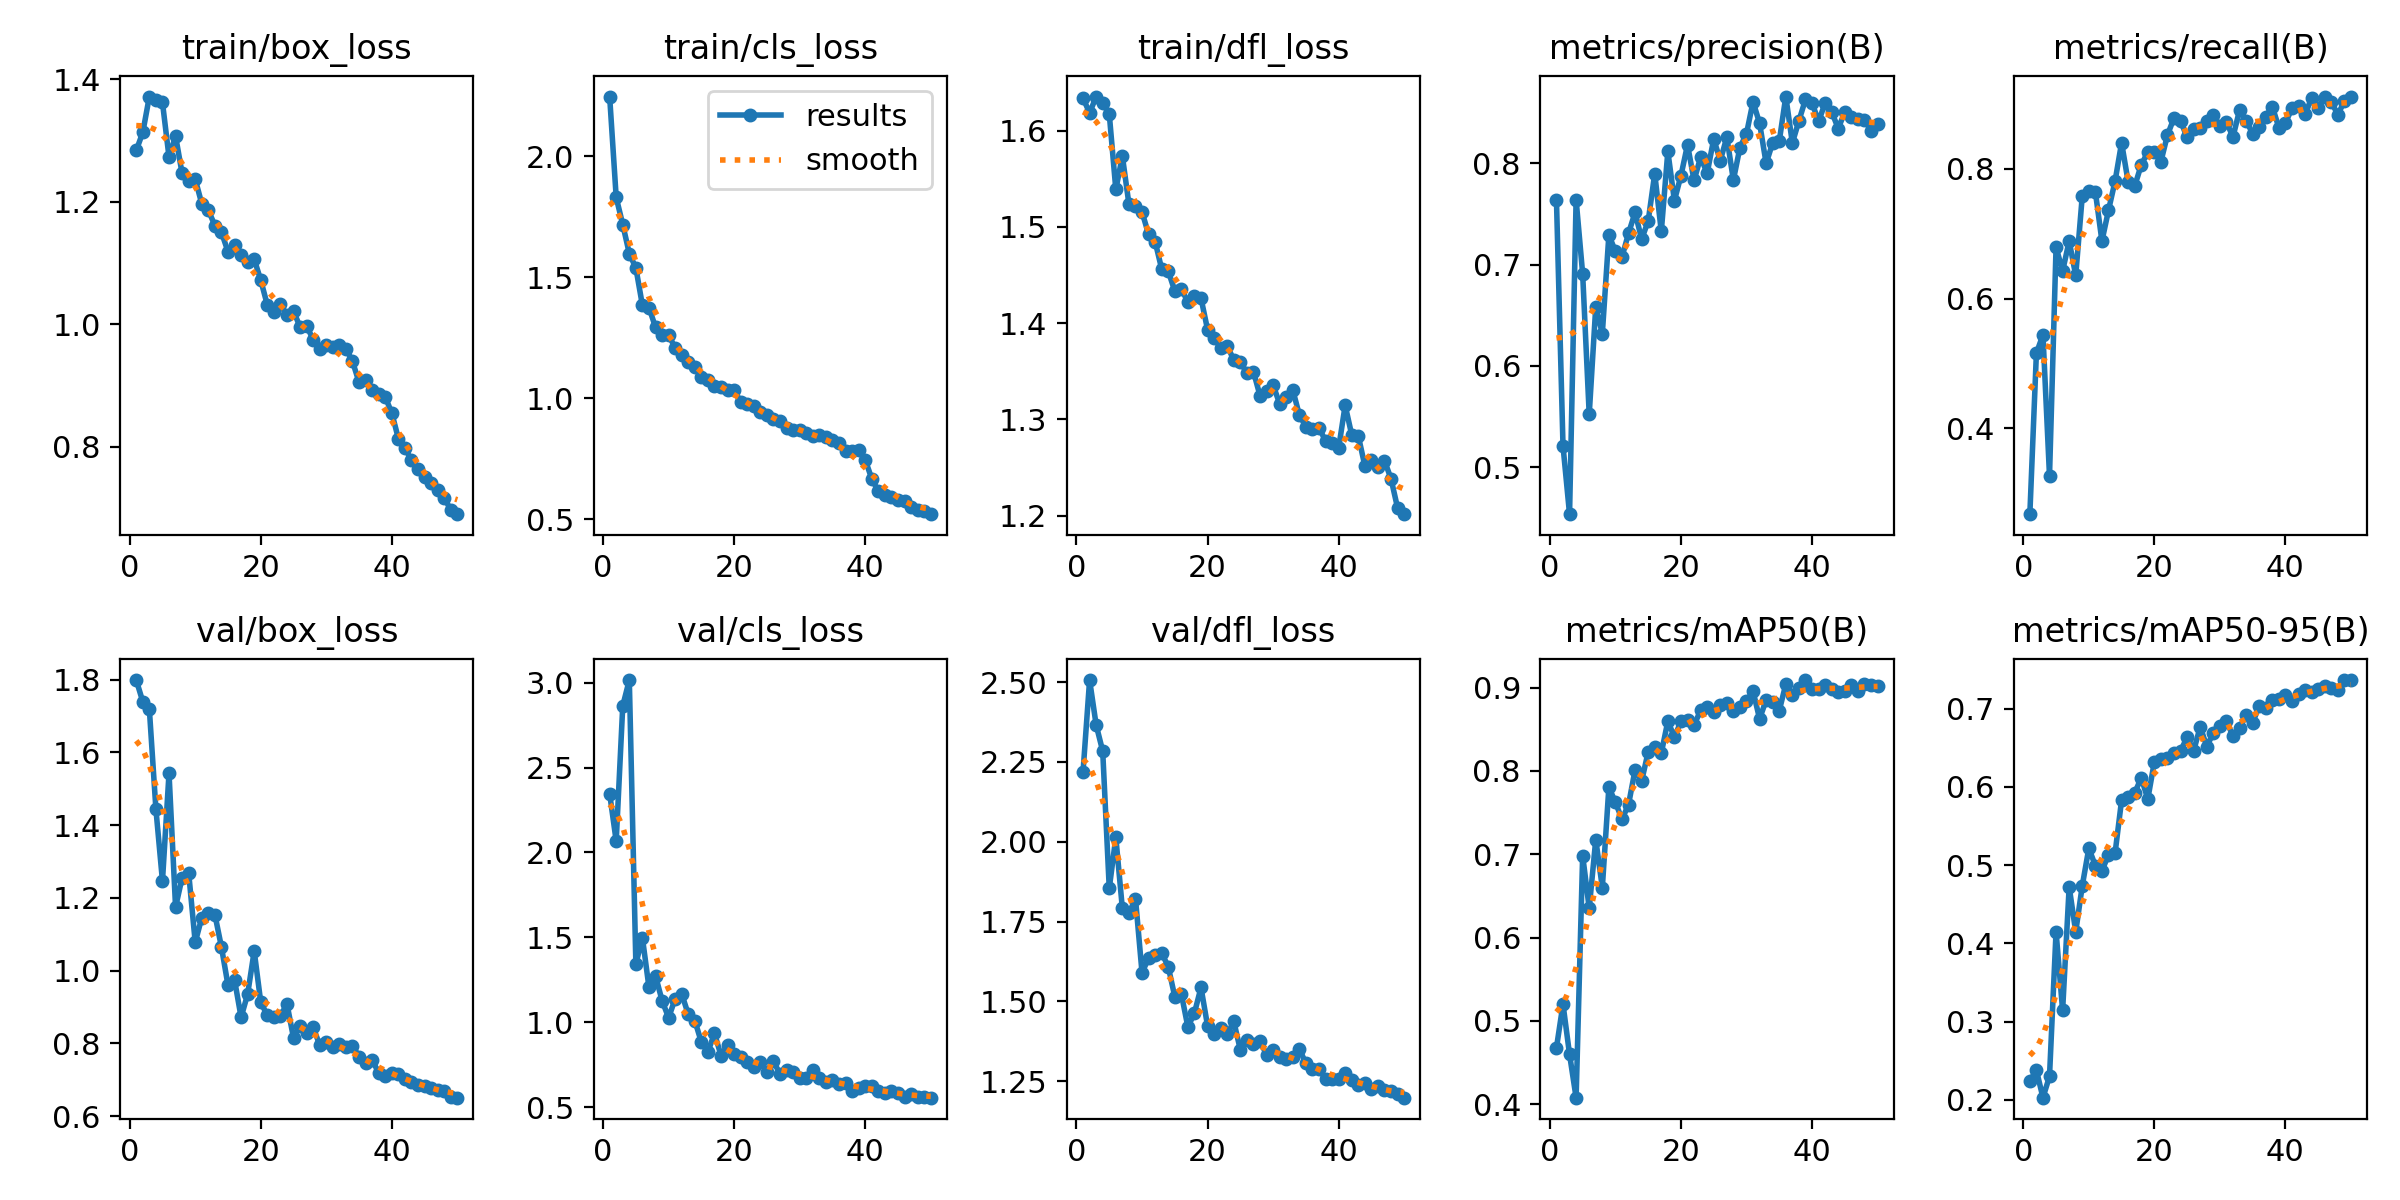

In [ ]:
Image(filename=f'/content/runs/detect/yolov8_augmented/results.png', width=600)

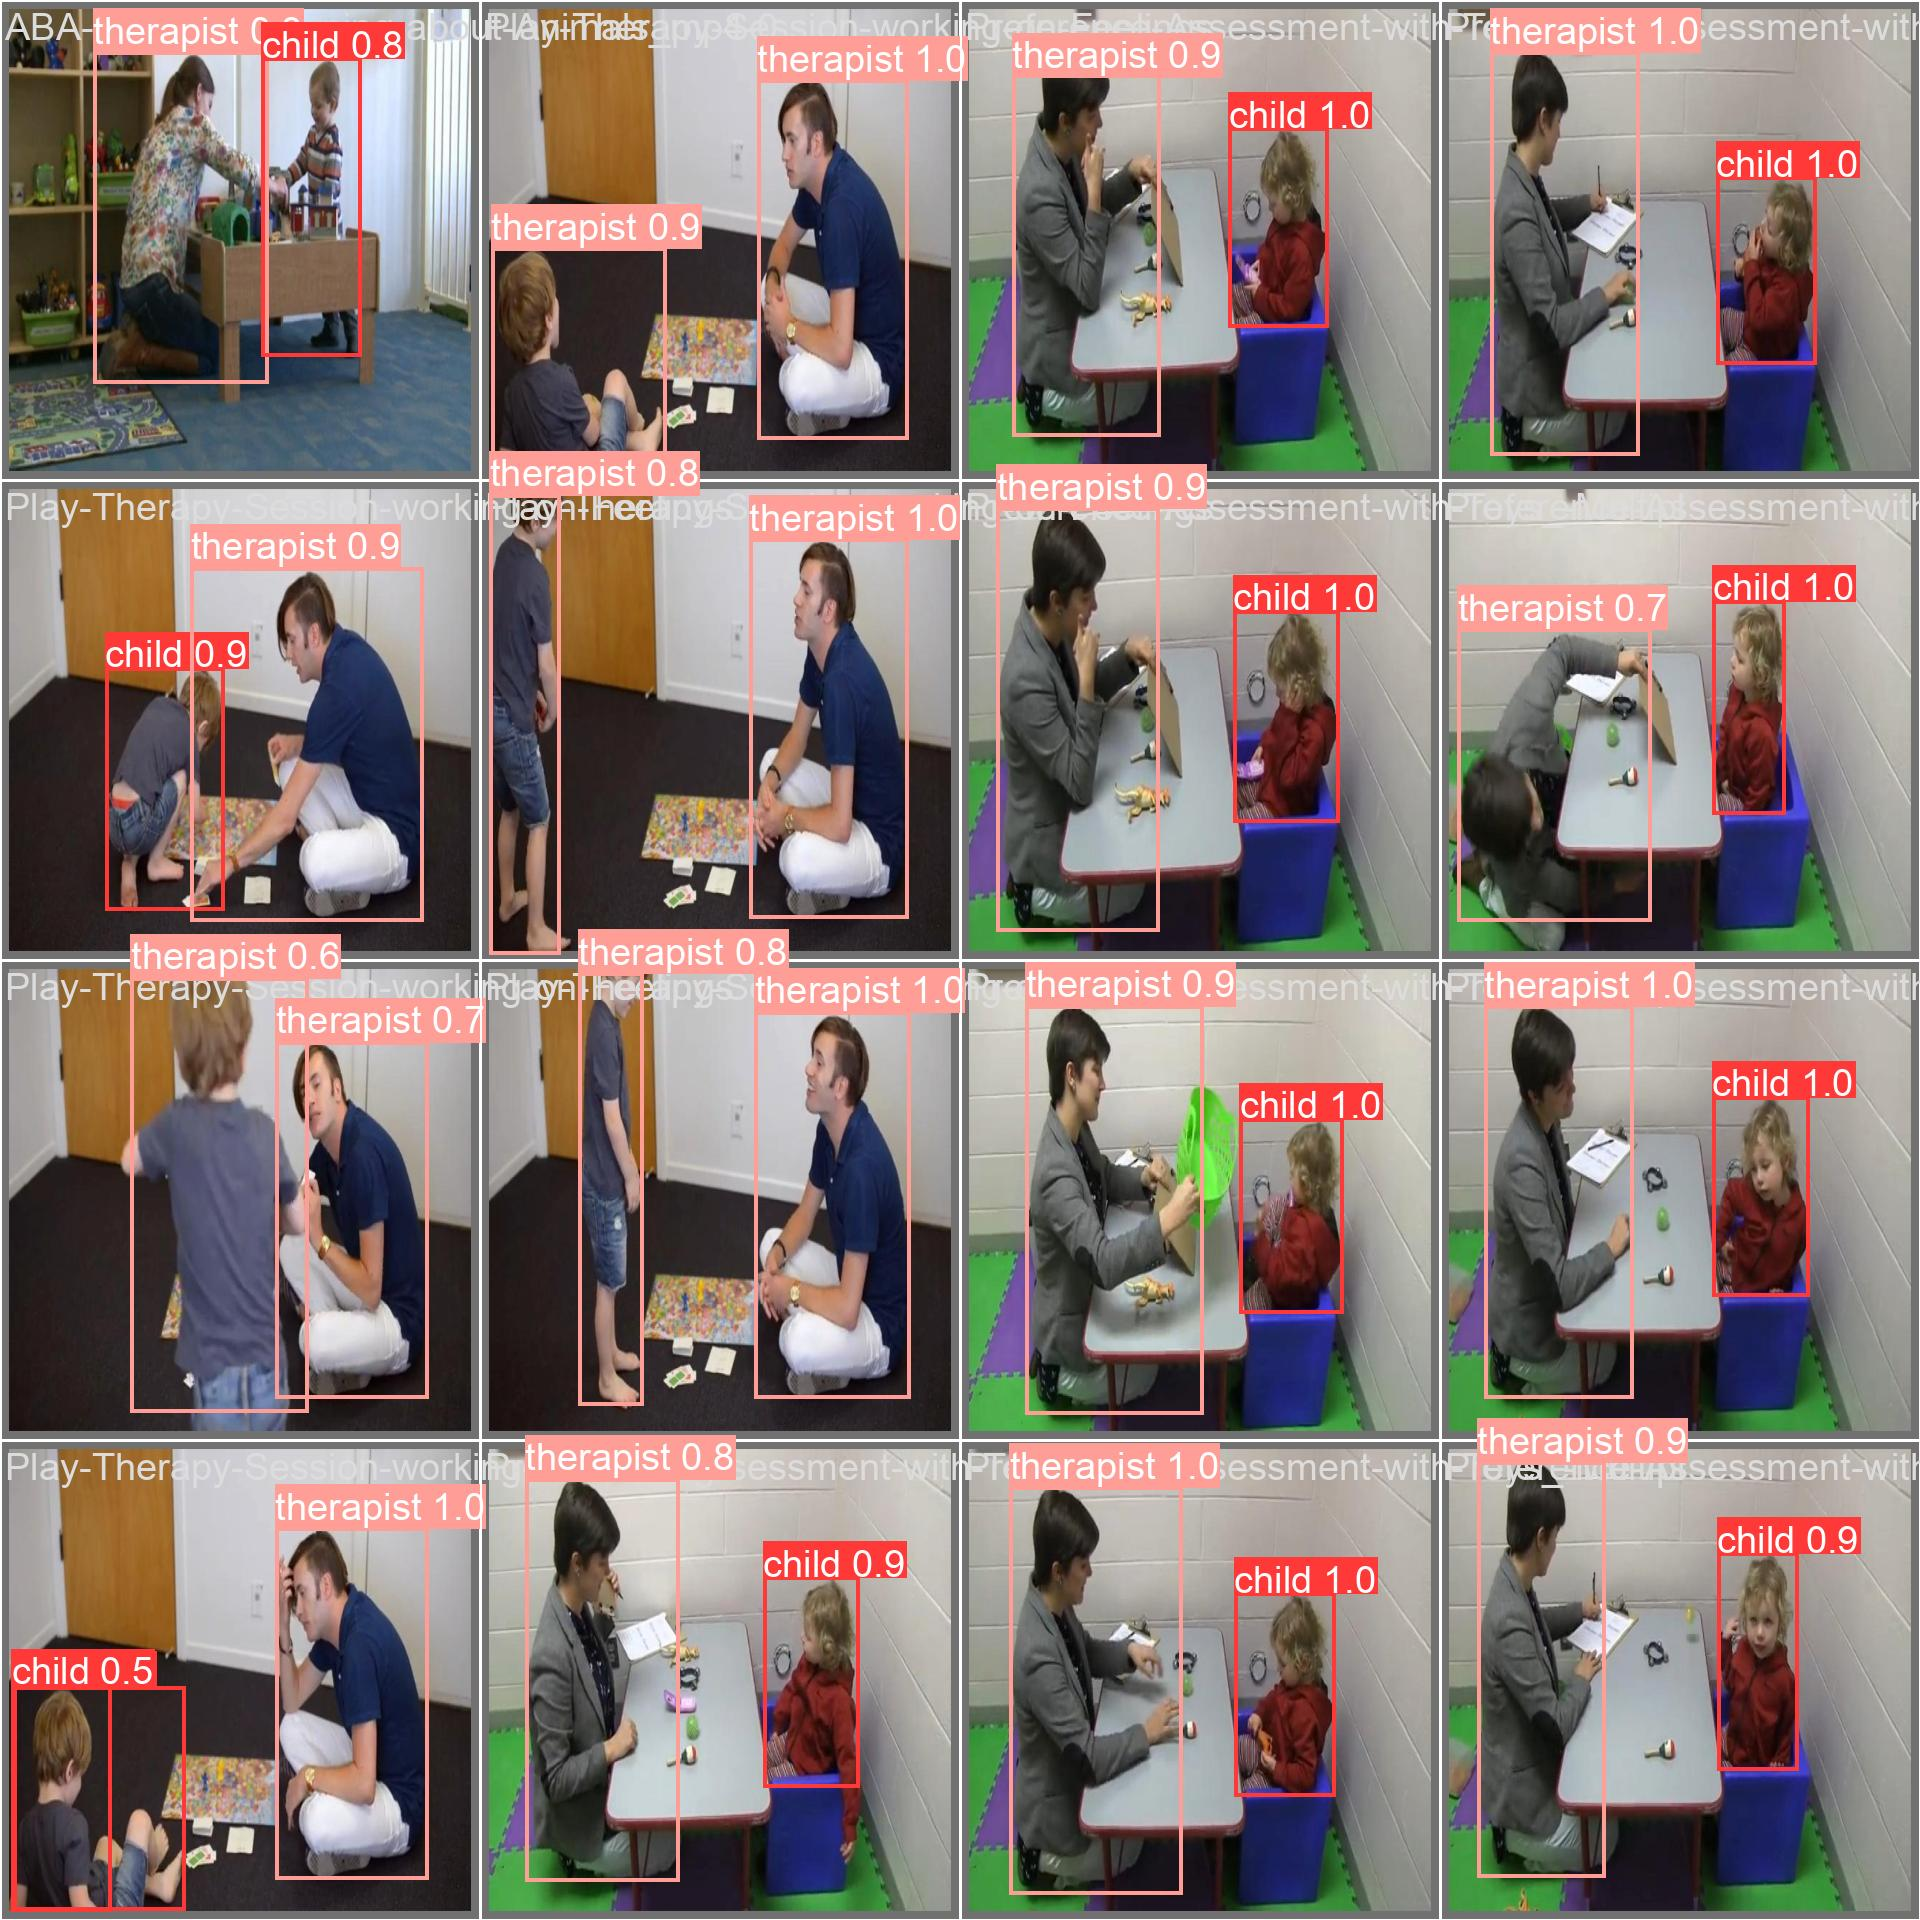

In [ ]:
Image(filename=f'/content/runs/detect/yolov8_augmented/val_batch0_pred.jpg', width=600)

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/best (2).pt')

# Adjust thresholds
model.conf = 0.4
model.iou = 0.5

# Run inference on a test video
results = model.predict(source='/content/test videos/Matching.mp4', save=True)


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
import os
import numpy as np
import cv2
from scipy.optimize import linear_sum_assignment
from collections import deque
from ultralytics import YOLO

class KalmanBoxTracker:
    count = 0
    def __init__(self, bbox, cls, appearance_feature=None):
        self.id = KalmanBoxTracker.count
        KalmanBoxTracker.count += 1
        self.bbox = bbox
        self.cls = cls
        self.hits = 0
        self.no_losses = 0
        self.trace = deque(maxlen=50)
        self.appearance_feature = appearance_feature

    def predict(self):
        self.no_losses += 1
        return self.bbox

    def update(self, bbox, appearance_feature=None):
        self.no_losses = 0
        self.hits += 1
        self.bbox = bbox
        self.trace.append(self.bbox)
        if appearance_feature is not None:
            self.appearance_feature = appearance_feature

class Sort:
    def __init__(self, max_age=20, min_hits=5, iou_threshold=0.5, appearance_weight=0.6):
        self.max_age = max_age
        self.min_hits = min_hits
        self.iou_threshold = iou_threshold
        self.appearance_weight = appearance_weight
        self.trackers = []

    def update(self, dets, appearance_features):
        if len(dets) == 0:
            return np.empty((0, 6))

        if len(self.trackers) == 0:
            for i in range(len(dets)):
                self.trackers.append(KalmanBoxTracker(dets[i][:4], dets[i][5], appearance_features[i]))

        matched, unmatched_dets, unmatched_trks = self.associate_detections_to_trackers(dets, appearance_features)

        for i in range(len(matched)):
            self.trackers[matched[i][1]].update(dets[matched[i][0]][:4], appearance_features[matched[i][0]])

        for i in unmatched_dets:
            self.trackers.append(KalmanBoxTracker(dets[i][:4], dets[i][5], appearance_features[i]))

        for i in reversed(unmatched_trks):
            if self.trackers[i].no_losses > self.max_age:
                del self.trackers[i]

        output = []
        for trk in self.trackers:
            if trk.hits >= self.min_hits or trk.no_losses == 0:
                output.append([trk.bbox[0], trk.bbox[1], trk.bbox[2], trk.bbox[3], trk.id, trk.cls])
        return np.array(output)

    def associate_detections_to_trackers(self, dets, appearance_features):
        if len(self.trackers) == 0:
            return np.empty((0, 2), dtype=int), np.arange(len(dets)), np.empty((0), dtype=int)

        iou_matrix = np.zeros((len(dets), len(self.trackers)), dtype=np.float32)
        appearance_similarity_matrix = np.zeros((len(dets), len(self.trackers)), dtype=np.float32)

        for d, det in enumerate(dets):
            for t, trk in enumerate(self.trackers):
                iou_matrix[d, t] = self.iou(det[:4], trk.bbox)
                appearance_similarity_matrix[d, t] = self.appearance_similarity(appearance_features[d], trk.appearance_feature)

        if min(iou_matrix.shape) > 0:
            combined_matrix = iou_matrix * (1 - self.appearance_weight) + appearance_similarity_matrix * self.appearance_weight
            matched_indices = linear_sum_assignment(-combined_matrix)
            matched_indices = np.stack(matched_indices, axis=1)
        else:
            matched_indices = np.empty((0, 2), dtype=int)

        unmatched_detections = []
        for d, det in enumerate(dets):
            if d not in matched_indices[:, 0]:
                unmatched_detections.append(d)

        unmatched_trackers = []
        for t, trk in enumerate(self.trackers):
            if t not in matched_indices[:, 1]:
                unmatched_trackers.append(t)

        matches = []
        for m in matched_indices:
            if iou_matrix[m[0], m[1]] < self.iou_threshold:
                unmatched_detections.append(m[0])
                unmatched_trackers.append(m[1])
            else:
                matches.append(m.reshape(1, 2))
        if len(matches) == 0:
            matches = np.empty((0, 2), dtype=int)
        else:
            matches = np.concatenate(matches, axis=0)

        return matches, np.array(unmatched_detections), np.array(unmatched_trackers)

    def appearance_similarity(self, feature1, feature2):
        if feature1 is None or feature2 is None:
            return 0
        return np.dot(feature1, feature2) / (np.linalg.norm(feature1) * np.linalg.norm(feature2))

    def iou(self, bb_test, bb_gt):
        xx1 = np.maximum(bb_test[0], bb_gt[0])
        yy1 = np.maximum(bb_test[1], bb_gt[1])
        xx2 = np.minimum(bb_test[2], bb_gt[2])
        yy2 = np.minimum(bb_test[3], bb_gt[3])
        w = np.maximum(0., xx2 - xx1)
        h = np.maximum(0., yy2 - yy1)
        wh = w * h
        o = wh / ((bb_test[2] - bb_test[0]) * (bb_test[3] - bb_test[1]) +
                  (bb_gt[2] - bb_gt[0]) * (bb_gt[3] - bb_gt[1]) - wh)
        return o

# Load your trained YOLO model
model = YOLO('/content/best.pt')

# Initialize SORT tracker with appearance feature support
tracker = Sort(max_age=20, min_hits=5, iou_threshold=0.5, appearance_weight=0.6)

# Set parameters
confidence_threshold = 0.7
valid_classes = [0, 1]
scale_factor = 1.0

def extract_appearance_feature(frame, bbox):
    x1, y1, x2, y2 = bbox
    roi = frame[y1:y2, x1:x2]
    roi = cv2.resize(roi, (64, 128))
    feature = cv2.calcHist([roi], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    feature = cv2.normalize(feature, feature).flatten()
    return feature

def process_video(input_video_path, output_dir):
    cap = cv2.VideoCapture(input_video_path)
    file_name = os.path.basename(input_video_path)
    output_video_path = os.path.join(output_dir, file_name)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Run inference on the frame using your trained model
        results = model(frame, conf=confidence_threshold, iou=0.4)

        # Prepare detections and appearance features for tracking
        detections = []
        appearance_features = []
        for result in results:
            boxes = result.boxes
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                conf = box.conf[0].cpu().numpy()
                cls = int(box.cls[0].cpu().numpy())

                if conf >= confidence_threshold and cls in valid_classes:
                    detections.append([x1, y1, x2, y2, conf, cls])
                    appearance_features.append(extract_appearance_feature(frame, [x1, y1, x2, y2]))

        # Convert detections to NumPy array for SORT
        np_detections = np.array(detections)

        # Update tracker with current detections and appearance features
        tracked_objects = tracker.update(np_detections, appearance_features)

        # Draw bounding boxes and unique IDs
        for obj in tracked_objects:
            x1, y1, x2, y2, obj_id, cls = obj.astype(int)
            label = model.names[cls]
            color = (0, 255, 0) if label == 'child' else (255, 0, 0)
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f'{label} {obj_id}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        out.write(frame)

    cap.release()
    out.release()

# Example input and output paths
input_video_path = '/content/Test_Videos/Matching.mp4'
output_dir = '/content/Output_videos'

# Run the optimized pipeline and save the video to the output directory
process_video(input_video_path, output_dir)


Streaming output truncated to the last 5000 lines.

0: 608x800 1 therapist, 12.0ms
Speed: 3.9ms preprocess, 12.0ms inference, 3.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 therapists, 10.5ms
Speed: 3.2ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 therapists, 9.9ms
Speed: 2.8ms preprocess, 9.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 therapists, 9.6ms
Speed: 3.1ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 2 therapists, 11.7ms
Speed: 3.2ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 therapist, 10.5ms
Speed: 3.2ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 therapist, 15.6ms
Speed: 4.9ms preprocess, 15.6ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 therapist, 15.2ms
Speed: 3.9ms p